In [28]:
import numpy as np
import pickle
from tqdm import tqdm
import matplotlib.pyplot as plt

import utils
from env import Maze
from agent import QAgent
from RL import ReinforcementLearning

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


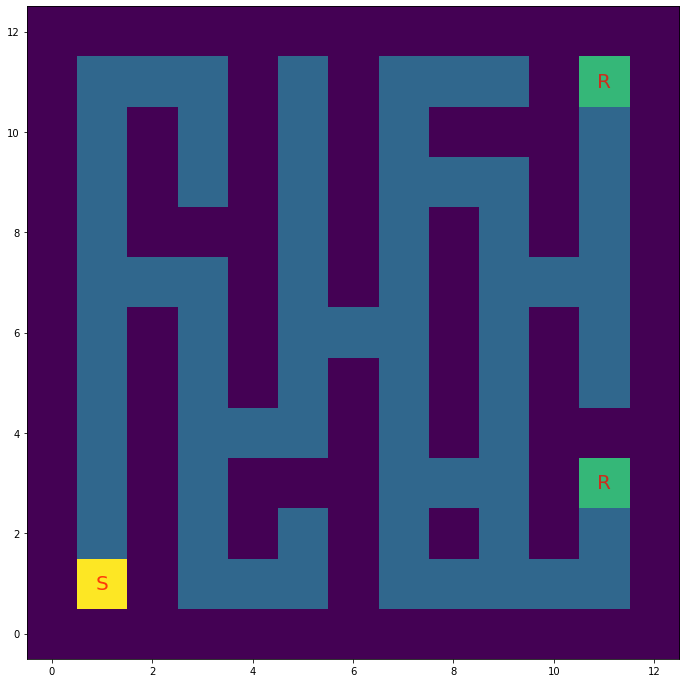

In [29]:
#Use later for wrapper function to run experiment
with open('Environments/maze.pickle', 'rb') as handle:
    env_info = pickle.load(handle)
utils.plot((env_info['height'], env_info['width']), env_info['walls'], env_info['start_state'], env_info['reward_states'])
    
      

In [30]:
agent_info = {
    'num_states':env_info['width']*env_info['height'],
    'num_actions':4,
    'step_size':0.5,
    'discount_factor':0.9,
    'epsilon':0.05,
}

In [31]:
RL = ReinforcementLearning(Maze, QAgent)

100%|██████████| 500/500 [00:07<00:00, 65.83it/s] 


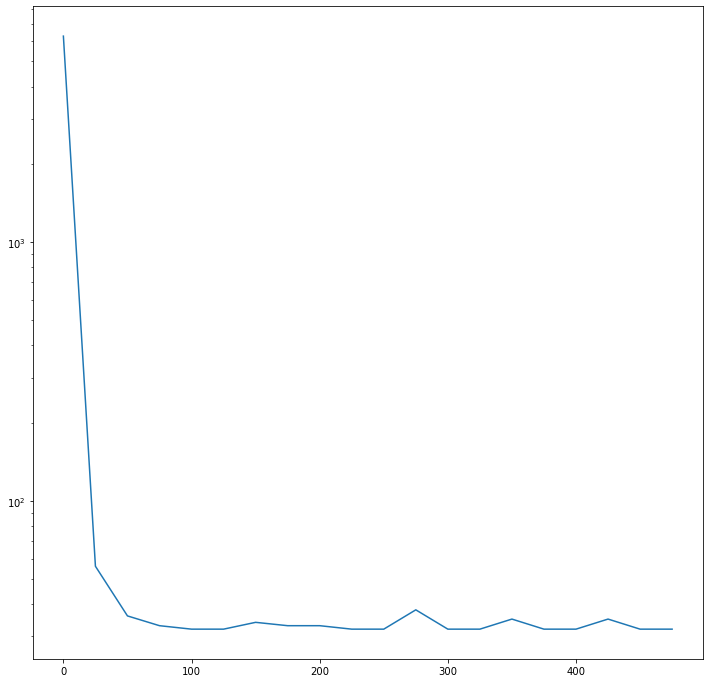

In [32]:
NUM_EPISODES = 500

num_steps = []

RL.rl_init(env_info, agent_info)

for episode in tqdm(range(NUM_EPISODES)):
    RL.rl_episode()
    
    if episode%25==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, 500, 25), num_steps)
plt.yscale("log")
plt.show()

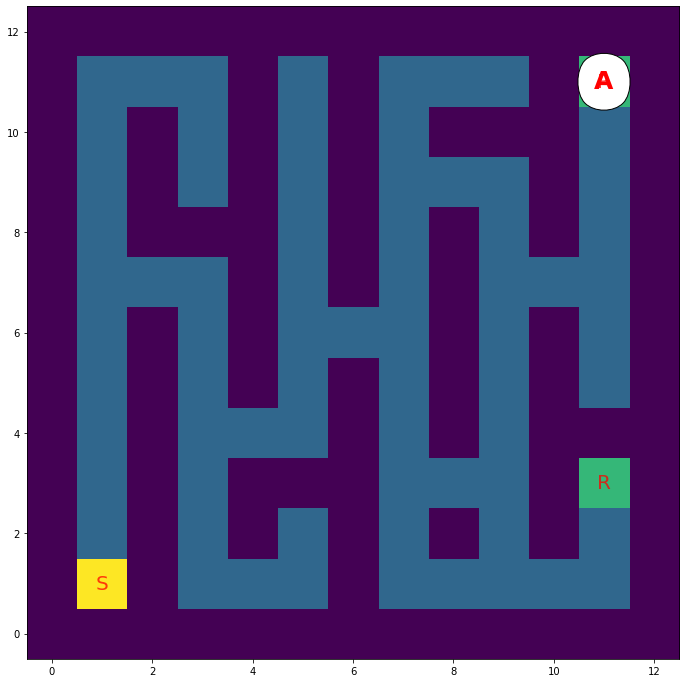

 23%|██▎       | 160/700 [00:07<00:03, 157.89it/s]

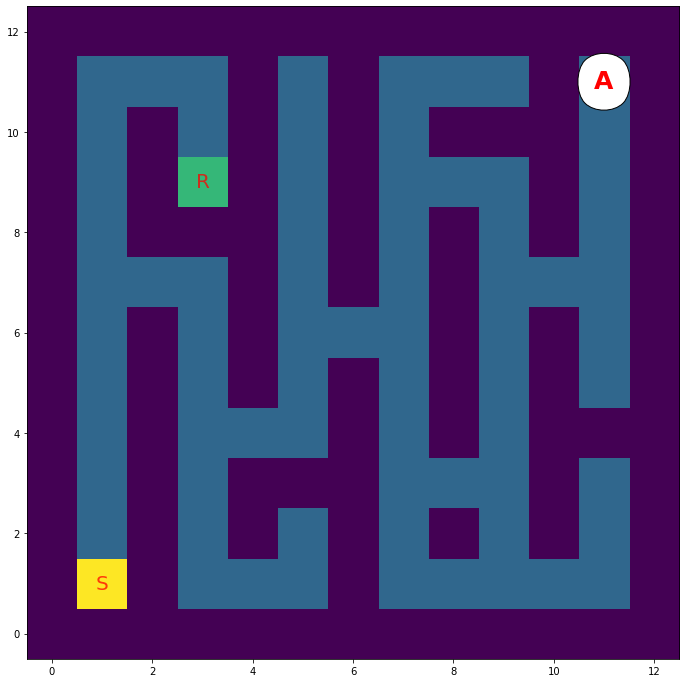

 38%|███▊      | 266/700 [00:11<00:09, 47.83it/s] 

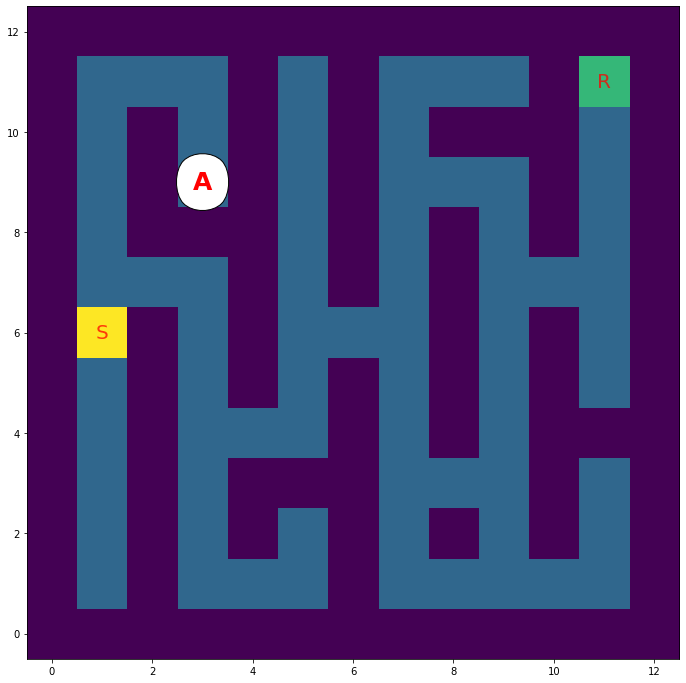

 75%|███████▍  | 522/700 [00:13<00:01, 102.67it/s]

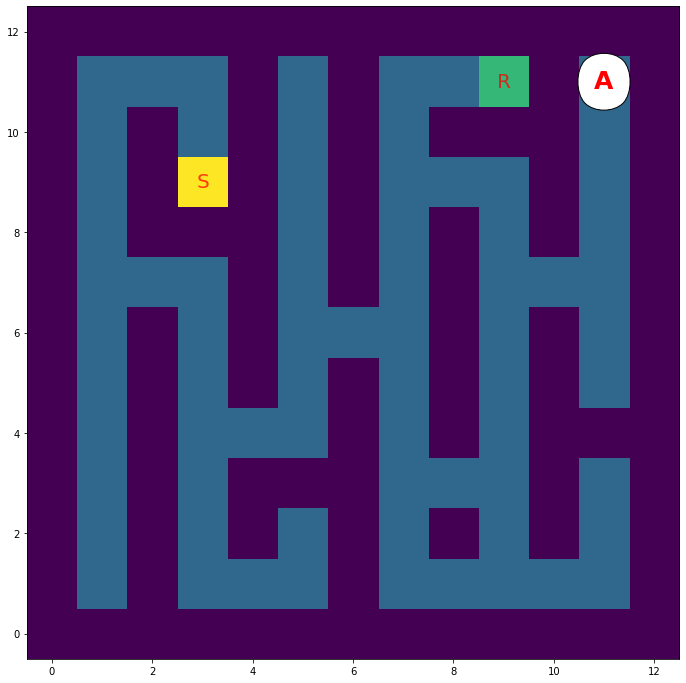

100%|██████████| 700/700 [00:15<00:00, 46.40it/s] 


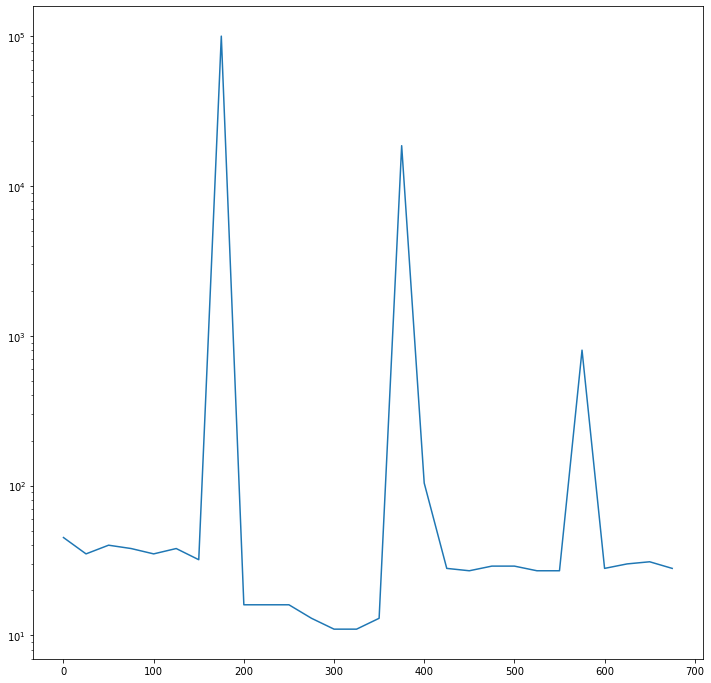

In [33]:
#Change the task every 200 steps

NUM_EPISODES = 700

num_steps = []

start_states = [(6, 1), (9, 3)]

reward_states = [(9, 3), (11, 11), (11, 9)]


RL.rl_init(env_info, agent_info)


RL.rl_plot()

for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode%300==0:
        index = episode//300
        RL.rl_change_task(start_state=start_states[index-1])
    if episode%200==0:
        index = episode//200
        RL.rl_change_task(reward_states=[reward_states[index-1]])
        
        RL.rl_plot()
    
    RL.rl_episode()
    
    if episode%25==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 25), num_steps)
plt.yscale("log")
plt.show()

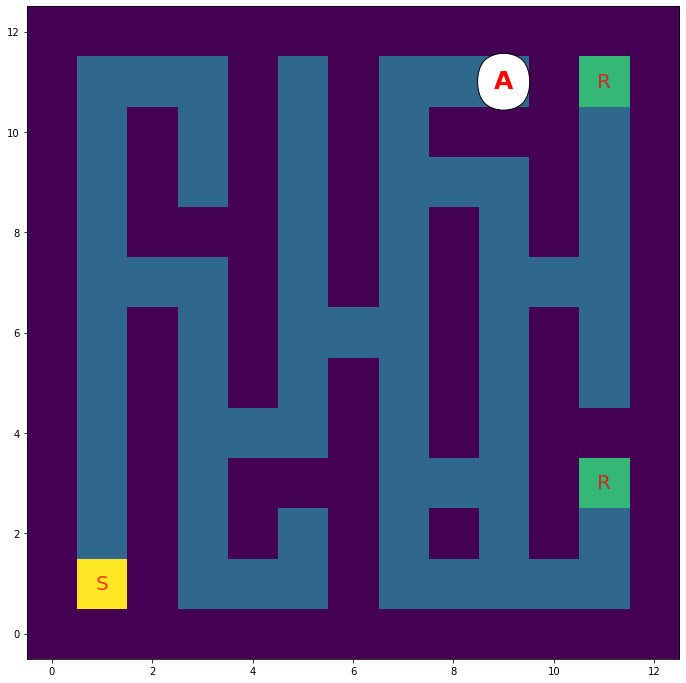

 30%|██▉       | 179/600 [00:08<00:02, 191.04it/s]

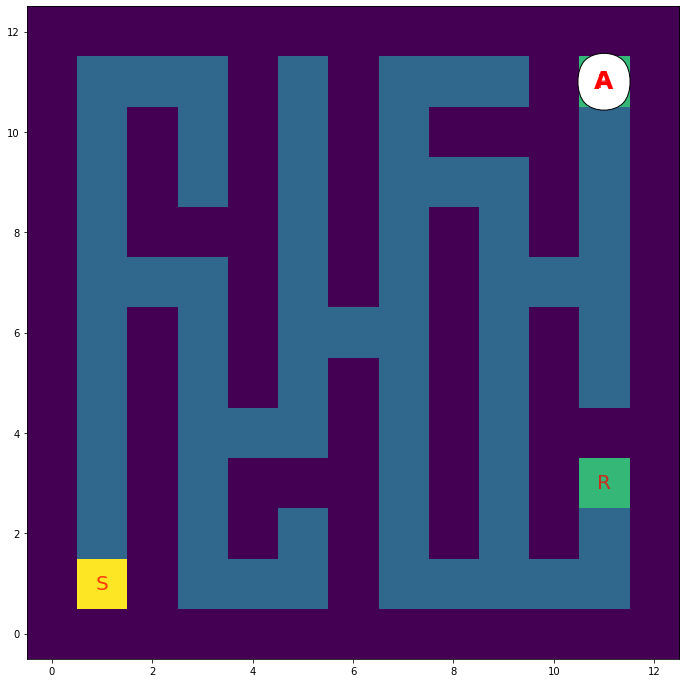

 65%|██████▌   | 391/600 [00:08<00:00, 353.89it/s]

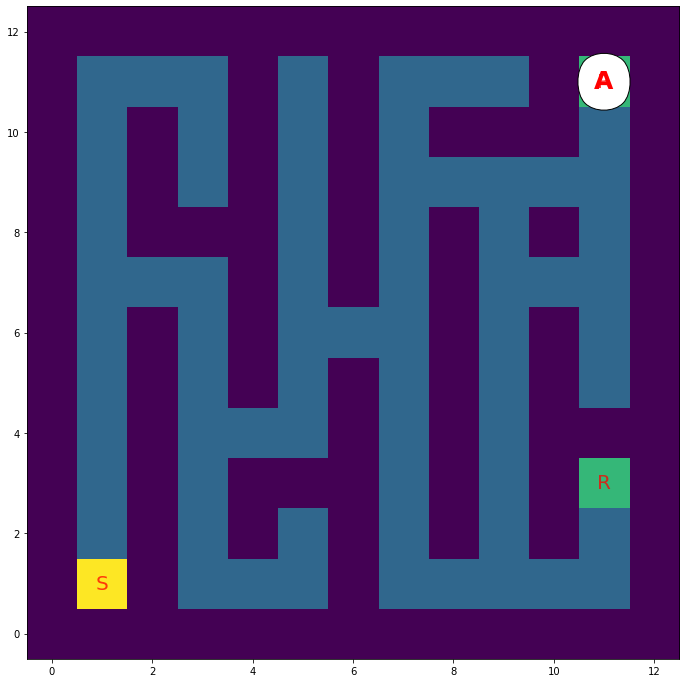

100%|██████████| 600/600 [00:09<00:00, 64.92it/s] 


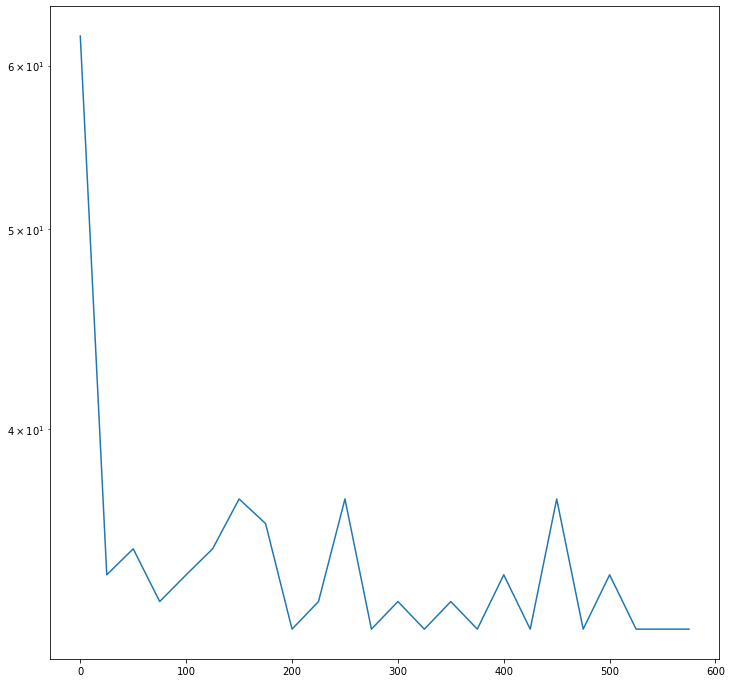

In [34]:
#Change environment after 200 steps

NUM_EPISODES = 600

num_steps = []

walls = env_info['walls'].copy()


RL.rl_init(env_info, agent_info)


RL.rl_plot()

for episode in tqdm(range(1, NUM_EPISODES+1)):
    if episode==200:
        walls_delta = walls 
        walls_delta.append((3, 8))
        RL.rl_change_env(walls_delta)
        
        RL.rl_plot()
        
    if episode==400:
        walls_delta.remove((9, 10))
        RL.rl_change_env(walls_delta)
        
        RL.rl_plot()
    
    RL.rl_episode()
    
    if episode%25==0:
        num_steps.append(RL.num_steps)
        

plt.figure(figsize=(12, 12))
plt.plot(range(0, NUM_EPISODES, 25), num_steps)
plt.yscale("log")
plt.show()